# Chapter 2: Multi-armed Bandits Solutions

## 1. Exercise 2.1
In ε-greedy action selection, for the case of two actions and $\epsilon=0.5$, what is the probability that the greedy action is selected?

### Solution
- Greedy Action is $a$, Non-greedy Action is $b$
- $p(b)=0.5 * \epsilon = 0.25$
- $p(a)=1-p(b)=0.75$

## 2. Exercise 2.2: Bandit example
Consider a *k-armed* bandit problem with $k = 4$ actions, denoted $1, 2, 3$, and $4$. Consider applying to this problem a bandit algorithm using ε-greedy action selection, sample-average action-value estimates, and initial estimates of $Q_1(a) = 0$, for all $a$. Suppose the initial sequence of actions and rewards is $A_1 = 1, R_1 =1,A_2 =2,R_2 =1,A_3 =2,R_3 =2,A_4 =2,R_4 =2,A_5 =3,R_5 =0$. On some of these time steps the $\epsilon$ case may have occurred, causing an action to be selected at random. On which time steps did this definitely occur? On which time steps could this possibly have occurred?

### Solution
- $\epsilon$ case is definitely occurred when $a \neq \arg\max\limits_aQ_t(a)$, other for possibly have occorred
    - Definitely occurred: $t\in\{2, 5\}$
    - Possibly occurred: $t\in\{1, 3, 4\}$

## 3. Exercise 2.3
In the comparison shown in Figure 2.2, which method will perform best in the long run in terms of cumulative reward and probability of selecting the best action? How much better will it be? Express your answer quantitatively.

![figure 2.2](./assets/figure_2.2.png)

### Solution


## 4. Exercise 2.4
If the step-size parameters, $\alpha_n$, are not constant, then the estimate $Q_n$ is a weighted average of previously received rewards with a weighting different from that given by (2.6). What is the weighting on each prior reward for the general case, analogous to (2.6), in terms of the sequence of step-size parameters?

$$Q_{n+1}=(1-\alpha)^nQ_1+\sum_{i=1}^n \alpha(1-\alpha)^{n-i}R_i ~~~, (2.6)$$

### Solution
$$
\begin{aligned}
Q_{n+1} &= Q_n + \alpha_n\big[R_n-Q_n\big]
\\ &= \alpha_nR_n + (1-\alpha_n)Q_n
\\ &= \alpha_nR_n + (1-\alpha_n)\big[\alpha_{n-1}R_{n-1} + (1-\alpha_{n-1})Q_{n-1}\big]
\\ &= \alpha_nR_n + (1-\alpha_n)\alpha_{n-1}R_{n-1} + (1-\alpha_n)(1-\alpha_{n-1})Q_{n-1}
\\ &= \alpha_nR_n + (1-\alpha_n)\alpha_{n-1}R_{n-1} + (1-\alpha_n)(1-\alpha_{n-1})Q_{n-1} + ... + R_1\alpha_1\prod_{i=2}^n(1-\alpha_i) + Q_1\prod_{i=1}^n(1-\alpha_i)
\\ &= Q_1\prod_{i=1}^n(1-\alpha_i) + \sum_{i=1}^nR_i\alpha_i\prod_{j=i+1}^n(1-\alpha_j)
\end{aligned}
$$

## 5. Exercise 2.5 (programming)
Design and conduct an experiment to demonstrate the difficulties that sample-average methods have for nonstationary problems. Use a modified version of the 10-armed testbed in which all the $q_∗(a)$ start out equal and then take independent random walks (say by adding a normally distributed increment with mean zero and standard deviation $0.01$ to all the $q_∗(a)$ on each step). Prepare plots like Figure 2.2 for an action-value method using sample averages, incrementally computed, and another action-value method using a constant step-size parameter, $α = 0.1$. Use $ε = 0.1$ and longer runs, say of $10,000$ steps.

### Code

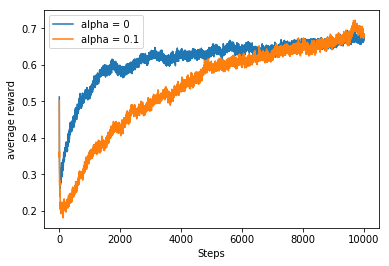

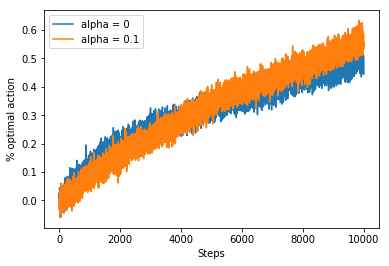

In [1]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np

class Bandit:
    def __init__(self, kArm=10, randWalkVariance=1e-2, epsilon=0.1, alpha=0.1):
        self.kArm = kArm
        self.randWalkVariance = randWalkVariance
        self.epsilon = epsilon
        self.alpha = alpha
        
        self.qTrue = np.zeros(self.kArm)
        self.qEst = np.zeros(self.kArm)
        self.actCnt = np.zeros(self.kArm)
    
    def getOptimalAction(self):
        return np.argmax(self.qTrue)
    
    def selectAction(self):
        # select an action
        action = 0
        if np.random.binomial(1, self.epsilon) == 1:
            action = np.random.choice(self.kArm)
        else:
            action = np.argmax(self.qEst)
        # random walks
        self.qTrue[action] += self.randWalkVariance * np.random.randn()
        # get reward
        reward = np.random.randn() + self.qTrue[action]
        # estimate Q
        stepSize = self.alpha
        if stepSize == 0:
            self.actCnt[action] += 1
            stepSize = 1.0 / self.actCnt[action]

        self.qEst[action] += stepSize * (reward - self.qEst[action])
        
        return  action, reward

def run(nBandits=2000, time=10000, epsilon=0.1, alphas=[]):
    optimalActions = [np.zeros(time, dtype='float') for _ in range(0, len(alphas))]
    averageRewards = [np.zeros(time, dtype='float') for _ in range(0, len(alphas))]
    for idx, alpha in enumerate(alphas):
        totalOptimalAction = 0
        totalReward = 0
        for _ in range(0, nBandits):
            bandit = Bandit(epsilon=epsilon, alpha=alpha)
            for t in range(0, time):
                action, reward = bandit.selectAction()
                averageRewards[idx][t] += reward
                if action == bandit.getOptimalAction():
                    optimalActions[idx][t] += 1
        # get average
        optimalActions[idx] /= nBandits
        averageRewards[idx] /= nBandits
    
    return optimalActions, averageRewards

alphas = [0, 0.1]
results = run(alphas=alphas)
for idx, result in enumerate(results):
    plt.figure()
    for alpha, data in zip(alphas, result):
        plt.plot(data, label='alpha = '+str(alpha))
    plt.xlabel('Steps')
    plt.ylabel('average reward' if idx == 0 else '% optimal action')
    plt.legend()

plt.show()

## 6. Exercise 2.6: Mysterious Spikes
The results shown in Figure 2.3 should be quite reliable because they are averages over $2,000$ individual, randomly chosen 10-armed bandit tasks. Why, then, are there oscillations and spikes in the early part of the curve for the optimistic method? In other words, what might make this method perform particularly better or worse, on average, on particular early steps?

### Solution
Explore until $Q_1$, so optimal action may not be selected usually.

## 7. Exercise 2.7: Unbiased Constant-Step-Size Trick
In most of this chapter we have used sample averages to estimate action values because sample averages do not produce the initial bias that constant step sizes do (see the analysis leading to (2.6)). However, sample averages are not a completely satisfactory solution because they may perform poorly on nonstationary problems. Is it possible to avoid the bias of constant step sizes while retaining their advantages on nonstationary problems? One way is to use a step size of
$$\beta_n = \dfrac{\alpha}{\overline o_n}~~~ (2.8)$$
to process the nth reward for a particular action, where $α > 0$ is a conventional constant
step size, and o ̄n is a trace of one that starts at $0$:
$$\overline o_n=\overline o_{n-1}+\alpha(1-\overline o_{n-1}), \text{for } n\geq 0, \text{with } \overline o_0=0 ~~~(2.9)$$
Carry out an analysis like that in (2.6) to show that $Q_n$ is an exponential recency-weighted average *without initial bias*.

### Solution
$$
\begin{aligned}
Q_{n+1} &= Q_1\prod_{i=1}^n(1-\beta_i) + \sum_{i=1}^nR_i\beta_i\prod_{j=i+1}^n(1-\beta_j)
\\ &= Q_1\prod_{i=1}^n\Big(1-\dfrac{\alpha}{\overline o_i}\Big) + \sum_{i=1}^nR_i\dfrac{\alpha}{\overline o_i}\prod_{j=i+1}^n\Big(1-\dfrac{\alpha}{\overline o_j}\Big)
\end{aligned}
$$

## 8. Exercise 2.8: UCB Spikes
In Figure 2.4 the UCB algorithm shows a distinct spike in performance on the 11th step. Why is this? Note that for your answer to be fully satisfactory it must explain both why the reward increases on the 11th step and why it decreases on the subsequent steps. Hint: if $c = 1$, then the spike is less prominent.

### Solution

## 9. Exercise 2.9
Show that in the case of two actions, the soft-max distribution is the same as that given by the logistic, or sigmoid, function often used in statistics and artificial neural networks.

### Solution
- 2 action's preferences: $H_1, H_2$
- Probability of $H_1$:
$$
\begin{aligned}
p(H_1) &= \dfrac{e^{H_1}}{e^{H_1}+e^{H_2}}
\\ &= \dfrac{1}{1+e^{H_2-H_1}}
\end{aligned}
$$

## 10. Exercise 2.10
Suppose you face a 2-armed bandit task whose true action values change randomly from time step to time step. Specifically, suppose that, for any time step, the true values of actions 1 and 2 are respectively 0.1 and 0.2 with probability 0.5 (case A), and 0.9 and 0.8 with probability 0.5 (case B). If you are not able to tell which case you face at any step, what is the best expectation of success you can achieve and how should you behave to achieve it? Now suppose that on each step you are told whether you are facing case A or case B (although you still don’t know the true action values). This is an associative search task. What is the best expectation of success you can achieve in this task, and how should you behave to achieve it?

### Solution


## 11. Exercise 2.11 (programming)
Make a figure analogous to Figure 2.6 for the nonstationary case outlined in Exercise 2.5. Include the constant-step-size ε-greedy algorithm with $\alpha=0.1$. Use runs of $200,000$ steps and, as a performance measure for each algorithm and parameter setting, use the average reward over the last $100,000$ steps.

### Code